### Імпорт бібліотек

In [1]:
import math
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data preparation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score # коефіцієнт детермінації

### Завантаження датасету та розподіл на training та test sets

In [2]:
df = pd.read_csv('data_score1234.csv')


In [3]:
df.head()

,region score,metro score,metro distance,appartment complex,rooms,area,price
0,1,2.0,1.64,0,2,50.0,10000
1,1,1.0,0.68,1,1,43.0,13000
2,1,3.0,7.25,0,3,75.0,15000
3,1,3.0,5.64,0,1,38.0,6000
4,1,3.0,6.11,0,1,38.0,6000


In [4]:
df.columns

Index(['region score', 'metro score', 'metro distance', 'appartment complex',
       'rooms', 'area', 'price'],
      dtype='object')

In [5]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (1427, 7)
test_df.shape : (612, 7)


In [6]:
input_cols = ['region score', 'metro distance', 'appartment complex', 'rooms', 'area']
target_col = 'price'

X_train, Y_train = train_df[input_cols].copy(), train_df[target_col].copy()
X_test, Y_test = test_df[input_cols].copy(), test_df[target_col].copy()

### Scale data

In [7]:
scaler = MinMaxScaler().fit(df[input_cols])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Linear Regression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lr_pred = lin_reg.predict(X_train)

lr_score = r2_score(Y_train, lr_pred)
lr_rmse = math.sqrt(mean_squared_error(Y_train, lr_pred))
print('Score:', lr_score)
print('RMSE:', lr_rmse)

Score: 0.5793709848166513
RMSE: 5668.751208145005


### 2. Random Forest Regressor

In [52]:
rand_forest = RandomForestRegressor(n_estimators=2000, max_depth=15, max_features='sqrt')
rand_forest.fit(X_train, Y_train)
rf_pred = rand_forest.predict(X_train)

rf_score = r2_score(Y_train, rf_pred)
rf_rmse = math.sqrt(mean_squared_error(Y_train, rf_pred))
print('Score:', rf_score)
print('RMSE:', rf_rmse)


Score: 0.9466343615176855
RMSE: 2019.1502555061938

Random Forest Regressor
Score: 0.7141790895361292
RMSE: 4570.075594653333


### 3. Support Vector Regression

In [10]:
svr_model = svm.SVR()
svr_model.fit(X_train, Y_train)
svr_pred = svr_model.predict(X_train)

svr_score = r2_score(Y_train, svr_pred)
svr_rmse = math.sqrt(mean_squared_error(Y_train, svr_pred))
print('Score:', svr_score)
print('RMSE:', svr_rmse)

Score: 0.011309124563383954
RMSE: 8690.965909626597


### 4. Decision Tree Regression

In [11]:
dec_tree_model = DecisionTreeRegressor()
dec_tree_model.fit(X_train, Y_train)
dec_tree_pred = dec_tree_model.predict(X_train)

dec_tree_score = r2_score(Y_train, dec_tree_pred)
dec_tree_rmse = math.sqrt(mean_squared_error(Y_train, dec_tree_pred))
print('Score:', dec_tree_score)
print('RMSE:', dec_tree_rmse)

Score: 0.9887131833413144
RMSE: 928.5889654899385


### 5. KNeighbors Regressor

In [12]:
kn_reg_model = KNeighborsRegressor()
kn_reg_model.fit(X_train, Y_train)
kn_reg_pred = kn_reg_model.predict(X_train)

kn_reg_score = r2_score(Y_train, kn_reg_pred)
kn_reg_rmse = math.sqrt(mean_squared_error(Y_train, kn_reg_pred))
print('Score:', kn_reg_score)
print('RMSE:', kn_reg_rmse)

Score: 0.7628403255390663
RMSE: 4256.554575915069


### 6. Logistic Regression

In [13]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)
log_reg_pred = log_reg_model.predict(X_train)

log_reg_score = r2_score(Y_train, log_reg_pred)
log_reg_rmse = math.sqrt(mean_squared_error(Y_train, log_reg_pred))
print('Score:', log_reg_score)
print('RMSE:', log_reg_rmse)

Score: 0.4141097151389115
RMSE: 6690.305226402205


### 7. Gradient Boosting Regressor

In [14]:
gb_reg_model = GradientBoostingRegressor(learning_rate=0.09)
gb_reg_model.fit(X_train, Y_train)
gb_reg_pred = gb_reg_model.predict(X_train)

gb_reg_score = r2_score(Y_train, gb_reg_pred)
gb_reg_rmse = math.sqrt(mean_squared_error(Y_train, gb_reg_pred))
print('Score:', gb_reg_score)
print('RMSE:', gb_reg_rmse)


Score: 0.7284502586328903
RMSE: 4554.728349098231


### 8. XGB Regressor

In [15]:
xgboost_model = XGBRegressor(max_depth=3, eta=0.33)
xgboost_model.fit(X_train, Y_train)
xgboost_pred = xgboost_model.predict(X_train)

xgboost_score = r2_score(Y_train, xgboost_pred)
xgboost_rmse = math.sqrt(mean_squared_error(Y_train, xgboost_pred))
print('Score:', xgboost_score)
print('RMSE:', xgboost_rmse)



Score: 0.8219262848517926
RMSE: 3688.3972800743486


### 9. Extra Tree Regressor

In [16]:
extra_tree = ExtraTreeRegressor()
reg = BaggingRegressor(extra_tree, random_state=0).fit(X_train, Y_train)
extra_tree_pred = reg.predict(X_train)

extra_tree_score = r2_score(Y_train, extra_tree_pred)
extra_tree_rmse = math.sqrt(mean_squared_error(Y_train, extra_tree_pred))
print('Score:', extra_tree_score)
print('RMSE:', extra_tree_rmse)


Score: 0.9370723897372819
RMSE: 2192.5949171980214


### Оцінка моделей на test set

In [45]:
lr_pred_test = lin_reg.predict(X_test)
lr_score_test = r2_score(Y_test, lr_pred_test)
lr_rmse_test = math.sqrt(mean_squared_error(Y_test, lr_pred_test))
print('\nLinear Regression')
print('Score:', lr_score_test)
print('RMSE:', lr_rmse_test)



rf_pred_test = rand_forest.predict(X_test)
rf_score_test = r2_score(Y_test, rf_pred_test)
rf_rmse_test = math.sqrt(mean_squared_error(Y_test, rf_pred_test))
print('\nRandom Forest Regressor')
print('Score:', rf_score_test)
print('RMSE:', rf_rmse_test)



svr_pred_test = svr_model.predict(X_test)
svr_score_test = r2_score(Y_test, svr_pred_test)
svr_rmse_test = math.sqrt(mean_squared_error(Y_test, svr_pred_test))
print('\nSupport Vector Regression')
print('Score:', svr_score_test)
print('RMSE:', svr_rmse_test)


dec_tree_pred_test = dec_tree_model.predict(X_test)
dec_tree_score_test = r2_score(Y_test, dec_tree_pred_test)
dec_tree_rmse_test = math.sqrt(mean_squared_error(Y_test, dec_tree_pred_test))
print('\nDecision Tree Regression')
print('Score:', dec_tree_score_test)
print('RMSE:', dec_tree_rmse_test)



kn_reg_pred_test = kn_reg_model.predict(X_test)
kn_reg_score_test = r2_score(Y_test, kn_reg_pred_test)
kn_reg_rmse_test = math.sqrt(mean_squared_error(Y_test, kn_reg_pred_test))
print('\nKNeighbors Regressor')
print('Score:', kn_reg_score_test)
print('RMSE:', kn_reg_rmse_test)


log_reg_pred_test = log_reg_model.predict(X_test)
log_reg_score_test = r2_score(Y_test, log_reg_pred_test)
log_reg_rmse_test = math.sqrt(mean_squared_error(Y_test, log_reg_pred_test))
print('\nLogistic Regression')
print('Score:', log_reg_score_test)
print('RMSE:', log_reg_rmse_test)


gb_reg_pred_test = gb_reg_model.predict(X_test)
gb_reg_score_test = r2_score(Y_test, gb_reg_pred_test)
gb_reg_rmse_test = math.sqrt(mean_squared_error(Y_test, gb_reg_pred_test))
print('\nGradient Boosting Regressor')
print('Score:', gb_reg_score_test)
print('RMSE:', gb_reg_rmse_test)


xgboost_pred_test = xgboost_model.predict(X_test)
xgboost_score_test = r2_score(Y_test, xgboost_pred_test)
xgboost_rmse_test = math.sqrt(mean_squared_error(Y_test, xgboost_pred_test))
print('\nXGB Regressor')
print('Score:', xgboost_score_test)
print('RMSE:', xgboost_rmse_test)


extra_tree_pred_test = reg.predict(X_test)
extra_tree_score_test = r2_score(Y_test, extra_tree_pred_test)
extra_tree_rmse_test = math.sqrt(mean_squared_error(Y_test, extra_tree_pred_test))
print('\nExtra Tree Regressor')
print('Score:', extra_tree_score_test)
print('RMSE:', extra_tree_rmse_test)


Linear Regression
Score: 0.574327565065174
RMSE: 5577.173415721903

Random Forest Regressor
Score: 0.7125541349212099
RMSE: 4583.048124318871

Support Vector Regression
Score: 0.019768915715963176
RMSE: 8463.31723230278

Decision Tree Regression
Score: 0.4949433139645376
RMSE: 6075.002305894769

KNeighbors Regressor
Score: 0.6384953403042242
RMSE: 5139.647504507312

Logistic Regression
Score: 0.4160712010756029
RMSE: 6532.1527544786595

Gradient Boosting Regressor
Score: 0.6445652050727368
RMSE: 5096.316071362179

XGB Regressor
Score: 0.6768116925986912
RMSE: 4859.641193655316

Extra Tree Regressor
Score: 0.682947946185301
RMSE: 4813.286026838869


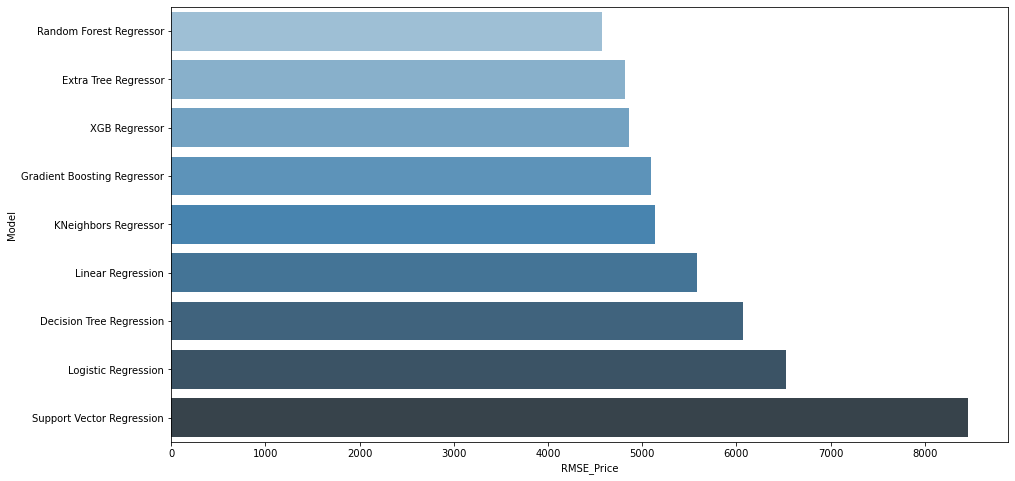

In [18]:
df_model = pd.DataFrame()
df_model['Model'] = ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regression',
                    'Decision Tree Regression', 'KNeighbors Regressor', 'Logistic Regression',
                    'Gradient Boosting Regressor', 'XGB Regressor', 'Extra Tree Regressor']

df_model['RMSE_Price'] = [lr_rmse_test, rf_rmse_test, svr_rmse_test, dec_tree_rmse_test,
                          kn_reg_rmse_test, log_reg_rmse_test, gb_reg_rmse_test, 
                          xgboost_rmse_test,extra_tree_rmse_test]

df_model['R2_Price'] = [lr_score_test, rf_score_test, svr_score_test, dec_tree_score_test,
                          kn_reg_score_test, log_reg_score_test, gb_reg_score_test, 
                          xgboost_score_test,extra_tree_score_test]

df_model = df_model.sort_values('RMSE_Price')

plt.figure(figsize=(15,8))
ax = sns.barplot(x="RMSE_Price", y="Model", data=df_model, palette="Blues_d")


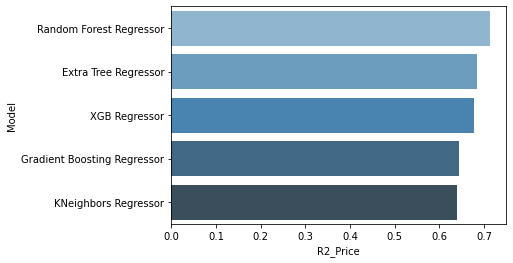

In [19]:
data1 = df_model.sort_values('R2_Price', ascending=False)[:5]
ax = sns.barplot(x="R2_Price", y="Model", data=data1, palette="Blues_d")

### Зберегти модель у файл

In [20]:
filename = 'rand_forest.sav'
pickle.dump(rand_forest, open(filename, 'wb'))

# filename = 'xgb.sav'
# pickle.dump(xgboost_model, open(filename, 'wb'))

# filename = 'gb_reg_model.sav'
# pickle.dump(gb_reg_model, open(filename, 'wb'))

In [21]:
# завантажити модель
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test, Y_test)

print("Test score: {0:.2f} %".format(100 * score))

Test score: 71.32 %


In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(base_estimator=rand_forest,n_estimators=50, random_state=42)
bag_reg.fit(X_train, Y_train)
bag_reg_pred = bag_reg.predict(X_train)

bag_reg_score = r2_score(Y_train, bag_reg_pred)
bag_reg_rmse = math.sqrt(mean_squared_error(Y_train, bag_reg_pred))
print('Score:', bag_reg_score)
print('RMSE:', bag_reg_rmse)


In [26]:
bag_reg_pred_test = bag_reg.predict(X_test)
bag_reg_score_test = r2_score(Y_test, bag_reg_pred_test)
bag_reg_rmse_test = math.sqrt(mean_squared_error(Y_test, bag_reg_pred_test))
print('\nBagging Regressor')
print('Score:', bag_reg_score_test)
print('RMSE:', bag_reg_rmse_test)


Bagging Regressor
Score: 0.7109748589245345
RMSE: 4595.620897894366
